# 분류(Classification) 모델 

- Decision Tree 
- Logistic Regression 
- Navie Bayes 
- Support Vector Machine 
- Nearest Neighbor(최소 근접 알고리즘) 

## [의사 결정 트리 (Decision Tree)](https://scikit-learn.org/stable/modules/tree.html#tree)

- 분류 및 회귀에 사용되는 비모수 감독 학습 방법입니다. 
- 목표는 데이터 기능에서 유추 된 간단한 결정 규칙을 학습하여 대상 변수의 값을 예측하는 모델을 만드는 것입니다.

- 대표적인 분류 학습 모델 
- 이해하고 해석하기 간단합니다. 나무를 시각화 할 수 있습니다.
- 약간의 데이터 전처리가 필요하다. 이 모듈은 결측값을 지원하지 않는다. 
- 숫자 데이터와 범주 데이터를 모두 처리 할 수 있습니다. 

#### 나무를 거꾸로 뒤집은 모양 :: 루트노드 -> 규칙 노드 -> 리프노트


```python 
class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0
```

### [1] 불순도  (Impurity) 

- 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻한다. 
- 불확실성 , 무질서도

### [2] 엔트로피 (Entropy) 

- 불순도를 수치적으로 나타낸 척도, 엔트로피가 높다는 것은 불순도가 높다. 

### [3] 정보 이득 (Information gain) : 1 - Entropy

- 결정트리는 구분 뒤 각 영역의 순도가 증가, 불순도는 감소하는 방향으로 학습을 진행
- 정보이론에 의한 정보 이득 

### [4] 지니계수 (Gini Coefficent):  1 - (각 범주별 데이터의 비율의 제곱의 합 ) 
- 순도가 높아지면 지니계수는 0이 된다. 1이면 최대 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글 출력을 위한 설정
import matplotlib
matplotlib.rcParams['font.family']="NanumBarunGothic"
matplotlib.rcParams['axes.unicode_minus'] = False

# Decision Tree 모듈 
from sklearn.tree import DecisionTreeClassifier
# 데이터 train/test 나누기 
from sklearn.model_selection import train_test_split

## Classification
- 다중 클래스 분류를 수행할 수 있다. 

In [3]:
from sklearn import tree 

X = [[0,0], [1, 1]]
Y = [0, 1]

# 훈련 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# 예측 
clf.predict([[2., 2.]])

# 리프 노드 에서 동일한 클래스 트레이닝 샘플의 비율 
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

### iris dataset으로 트리를 구성 

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree 

X, y = load_iris(return_X_y = True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 한번의 훈련, plot_tree( ) 함수를 사용해 트리플로팅 

In [5]:
# Iris Data set 가져오기 
from sklearn.datasets import load_iris

iris = load_iris()

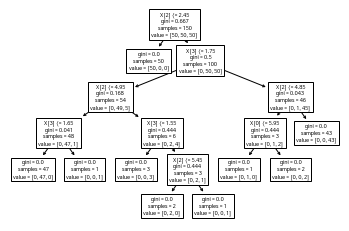

In [6]:
tree.plot_tree(clf.fit(iris.data, iris.target))
plt.show()

### graphviz 이용해 pdf 출력 

In [8]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

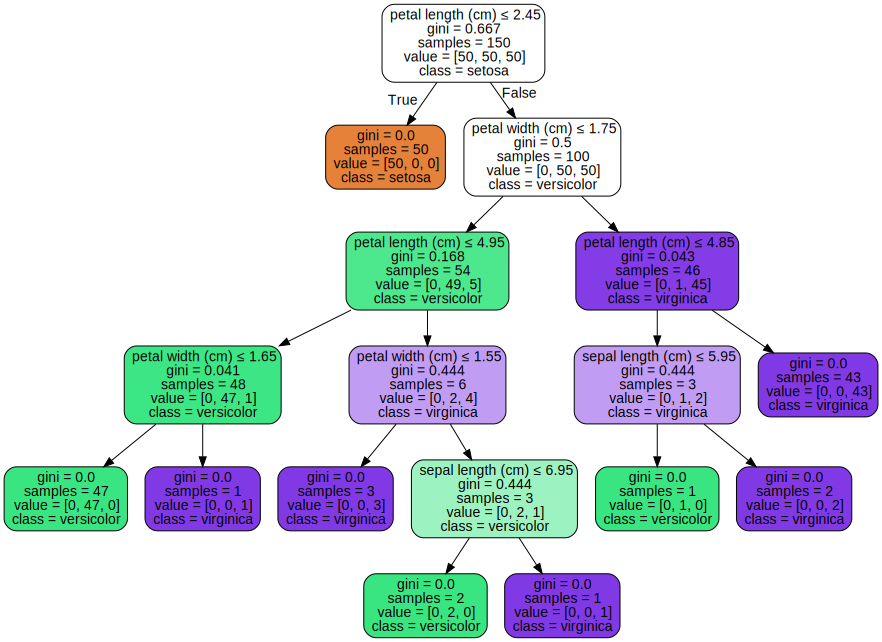

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

## Iris 품종 예측하기 

In [9]:
# Iris Data set 가져오기 
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)  # Bunch 타입 


# x 피쳐(Feature)만 가져오기 
iris_data = iris.data
iris_data

# y 값(Labeel) 만 추출 
iris_label = iris.target
iris_label

# y label 이름 추출 
print(iris.feature_names)

# x label 이름 추출 
print(iris.target_names)

# ['setosa' 'versicolor' 'virginica'] - 품종 
# ['sepal length (cm)'  - 꽃받침 
# 'sepal width (cm)',   
# 'petal length (cm)',  - 꽃잎
# 'petal width (cm)']

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris_label
iris_df

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### test data set/ train data set 분리 

In [10]:
# Create a random dataset  : train 80%,  test 20%  
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, 
                                                    random_state=11) # 20%  random seed 고정, 동일한 데이터 추출 

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((120, 4), (30, 4), (120,), (30,))

((120, 4), (30, 4), (120,), (30,))

### 학습

In [11]:
# Fit regression model
dt_clf = DecisionTreeClassifier(random_state=11) # seed 고정, 동일한 학습 

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### 예측

In [12]:
# Predict 
pred = dt_clf.predict(X_test)
pred, y_test

(array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]),
 array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]))

### 정확도 

In [13]:
# accuracy 
from sklearn.metrics import accuracy_score, classification_report

print('정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))  # 0.933


cl_report = classification_report(y_test, pred)
print('리포트: \n', cl_report)

정확도:  0.9333
리포트: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## 결정 트리 모델의 시각화 : 학습과정

In [14]:
# Create a random dataset  : train 80%,  test 20%  
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, 
                                                    random_state=11) # 20%  random seed 고정, 동일한 데이터 추출 

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((120, 4), (30, 4), (120,), (30,))

dt_clf = DecisionTreeClassifier(random_state=11) # seed 고정, 동일한 학습 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names= iris.target_names,
               feature_names=iris.feature_names,impurity=True, filled=True)

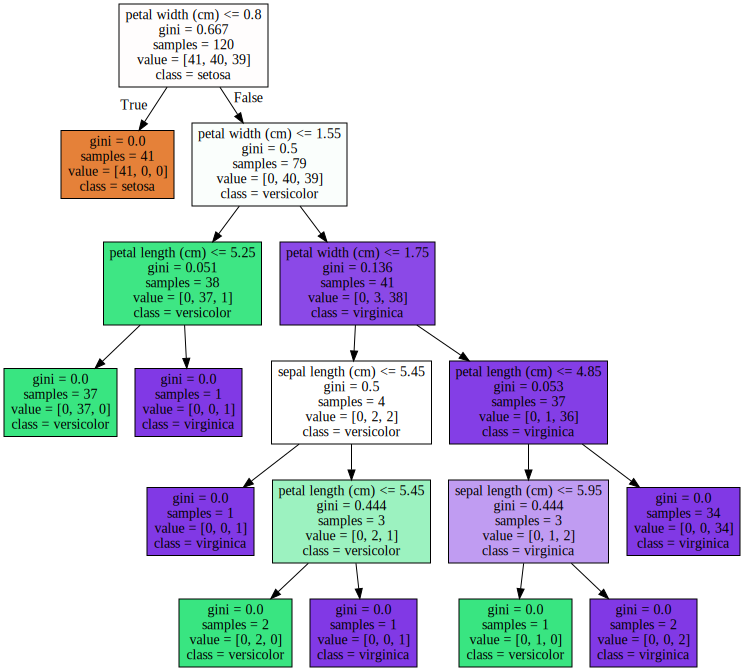

In [16]:
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
# 지니계수 : 0.667 

# gini = 0.667
# samples = 120
# value = [41, 40, 30]
# calss = setosa 

gini = 1-((41/120)**2 + (40/120)**2 + (39/120)**2)
print(gini)


# petal length (cm) ≤ 4.95
# gini = 0.168
# samples = 54
# value = [0, 49, 5]
# class = versicolor

gini = 1-((0/54)**2 + (49/54)**2 + (5/54)**2)
print(gini)

0.6665277777777778
0.16803840877914955


### Feature importance  : 결정 트리의 규칙노드가 분기 조건으로 사용할 피쳐의 우선 순위에 사용  


In [18]:
import seaborn as sns

Feature Importance:
[0.025 0.    0.049 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.049
petal width (cm) : 0.926


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


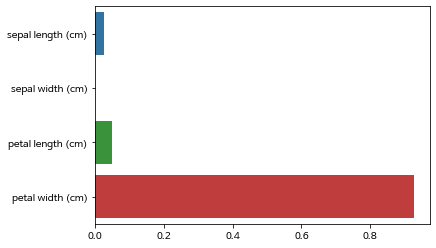

In [19]:
print('Feature Importance:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x = dt_clf.feature_importances_, y=iris.feature_names)
iris_df.corr()   # 상관 관계

### 내부 알고리즘 처리 과정 분석 

#### GINI 계수 함수 구현 

In [20]:
def gini(value):
    array_of_values = np.array(value)
    array_of_sum = array_of_values.sum()
    squared_sum = 0 
    
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1- squared_sum, 3)

gini([41, 40, 39])

0.667

### 1번 노드 : 

```python 
petal width (cm) <= 0.8
gini = 0.667
samples = 120
value = [41, 40, 39]
class = setosa
```

In [21]:
# 1번 노드 : 루트 노드, 규칙 노드 (자식을 가지고 있음) 
# root node 실행 구조

first_df = pd.DataFrame(data=X_train, columns=iris.feature_names)
first_df['label'] = y_train

first_df

print(first_df['label'].value_counts())   
print(gini([41, 40, 39]))      # gini = 0.667 , 지니 계수가 크므로 자식노드(2, 3번)로 분리 된다.


# 자식노드 생성 
second_node = first_df[first_df['petal width (cm)'] <=0.8]   # => 자식 노드 (2번 노드) 생성
third_node =  first_df[first_df['petal width (cm)'] > 0.8]   # => 자식 노드 (2번 노드) 생성

0    41
1    40
2    39
Name: label, dtype: int64
0.667


### 2번 노드 :  쳣번째 터미널 노드, 리프 노드 

```python 
gini = 0.0
samples = 41
value = [41, 0, 0]
class = setosa
```

In [22]:
second_node['label'].value_counts()
print('gini: ', gini([41,0,0]))         # gini : 0.0 
print('class: ', iris.target_names[0])  # 'setosa'


# 2번 노드('setosa') 결과 
setosa_result = second_node.copy()
setosa_result.head()

gini:  0.0
class:  setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
3,5.0,3.3,1.4,0.2,0
4,4.7,3.2,1.6,0.2,0
8,5.5,3.5,1.3,0.2,0
12,4.6,3.4,1.4,0.3,0


### 3번 노드 : 쳣번째 터미널 노드, 리프 노드

```python 
petal width (cm) <= 1.55
gini = 0.5
samples = 79
value = [0, 40, 39]
class = versicolor
```


In [23]:
print(third_node['label'].value_counts())
print('gini:', gini([0, 40, 40]))
      
# 자식노드 생성 
fourth_node = third_node[third_node['petal width (cm)'] <= 1.55]   # => 자식 노드 (4번 노드) 생성
fifth_node =  third_node[third_node['petal width (cm)'] > 1.55]   # => 자식 노드 (5번 노드) 생성

1    40
2    39
Name: label, dtype: int64
gini: 0.5


### 4번 노드 : 규칙 노드 
```python 
petal length (cm) <= 5.25
gini = 0.051
samples = 38
value = [0, 37, 1]
class = versicolor
```


In [24]:
print(fourth_node['label'].value_counts())
print('gini:' , gini([0, 37, 1]))


# 자식 노드 생성
sixth_node = fourth_node[fourth_node['petal length (cm)'] <=5.25]
seventh_node = fourth_node[fourth_node['petal length (cm)'] > 5.25]

1    37
2     1
Name: label, dtype: int64
gini: 0.051


### 5번 노드 : 규칙노드 

```python
petal width (cm) <= 1.75
gini = 0.136
samples = 41
value = [0, 3, 38]
class = virginica
```


In [25]:
print(fifth_node['label'].value_counts())
print('gini:' , gini([0, 3, 38]))

# 자식 노드 생성
eigh_node = fifth_node[fifth_node['petal width (cm)'] <= 1.75]
ninth_node = fifth_node[fifth_node['petal width (cm)'] > 1.75]

2    38
1     3
Name: label, dtype: int64
gini: 0.136


### 6번 노드 : 두 번째 터미널 노드 . 리프 노드 

```python
gini = 0.0
samples = 37
value = [0, 37, 0]
class = versicolor
```

In [26]:
print(sixth_node['label'].value_counts())
print('gini: ', gini([0, 37, 0]))         # gini: 0.0
print('class: ', iris.target_names[1])    # 'versicolor'


versicolor_result = sixth_node.copy()
versicolor_result.head()

1    37
Name: label, dtype: int64
gini:  0.0
class:  versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
10,5.0,2.0,3.5,1.0,1
13,6.9,3.1,4.9,1.5,1
15,5.1,2.5,3.0,1.1,1
16,6.6,2.9,4.6,1.3,1
22,5.9,3.0,4.2,1.5,1


### 7번 노드 : 세 번째 터미널 노드. 리프 노드

```python
gini = 0.0
samples = 1
value = [0, 0, 1]
class = virginica
```



In [27]:
print(seventh_node['label'].value_counts())
print('gini: ', gini([0, 0, 1]))            #  gini : 0.0  
print('class: ', iris.target_names[2])     # 'virginica'

virginica_result = seventh_node.copy()
virginica_result

2    1
Name: label, dtype: int64
gini:  0.0
class:  virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
30,6.1,2.6,5.6,1.4,2


### 최종 학습 결과 출력 확인 

In [28]:
fit_result = pd.concat([setosa_result,versicolor_result,virginica_result],axis = 0)
print(fit_result.shape)
print(fit_result['label'].value_counts())

(79, 5)
0    41
1    37
2     1
Name: label, dtype: int64


## 모형 최적화

###  결정 트리의 파라메터 튜닝 : 학습시간 및 과적합 제어 

#### 과적합(Overfitting)
: 학습 데이터에서는 예측 정확도가 높이 나오는데 학습에서 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 예측 정확도 떨어지는 경우, 피처가 지나치게 많을 때도 발생

```python
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
```

- **max_depth** :   트리의 최대 깊이, None , 깊이가 너무 깊으면 과적합 , 깊이가 낮으면 정확도가 감소
- max_features : 최대 피쳐 갯수, None , 모든 피쳐를 사용 
- max_leaf_nodes : 리프노드의 최대 갯수, None , 무한대로 사용하겠다.
- **min_samples_leaf** : 리프노드가 되기 위한 최소한의 샘플데이터 수, 1, 불순도를 조절 
- **min_samples_split** : 노드(자식노드)를 분할하기 위한 최소의 샘플데이터 수, 2, yes or no, 과적합을 조절하는데 사용

### [1] max_depth 값을 조정 : 

In [29]:
# 학습(Train) 수행
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = None) # 정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 1) # 정확도: 0.6333   , 정확도 감소
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2) # 정확도: 0.8667   , 정확도 감소
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 3) # 정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 4) # 정확도: 0.9333

dt_clf.fit(X_train,y_train)


# Predict 
pred = dt_clf.predict(X_test)


# 정확도 
print('정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

cl_report = classification_report(y_test, pred)
print('리포트: \n', cl_report)

정확도:  0.9333
리포트: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



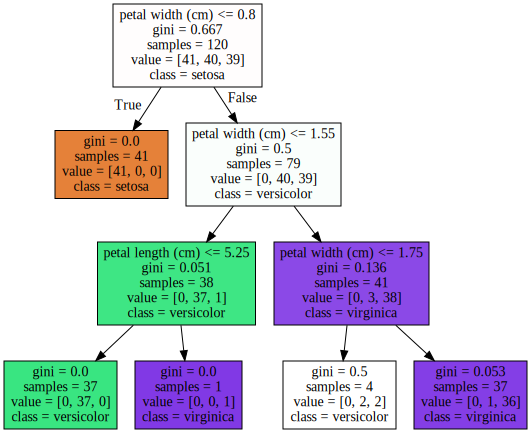

In [30]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names= iris.target_names,
               feature_names=iris.feature_names,impurity=True, filled=True)

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

### [2] min_samples_leaf: 리프노드 

- 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합을 제어하는 데 사용, 정확도에도 영향

In [31]:
# 학습(Train) 수행
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 2) # 정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 4) # 정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 41) # 정확도: 0.9333
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 42) # 정확도: 0.8667  , 정확도 감소

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)

# 정확도
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.8667


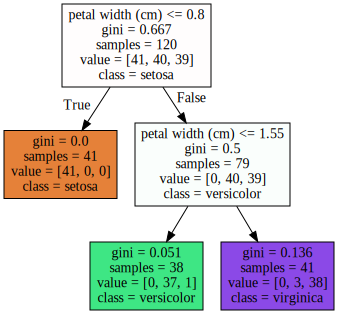

In [32]:
export_graphviz(dt_clf, out_file='tree.dot', class_names= iris.target_names,
               feature_names=iris.feature_names,impurity=True, filled=True)

import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

### [3] min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플데이터 수, 1

In [33]:
# 학습(Train) 수행
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 1) # 정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 4) # 정확도: 0.9333  , 적정값
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 5) # 정확도: 0.8667, 정확도 감소
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 39) # 정확도: 0.9333,    적정값
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 40) # 정확도: 0.6333, 정확도 감소


dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)

# 정확도
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


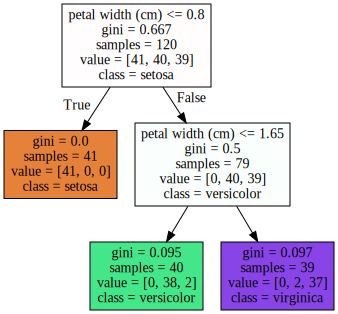

In [34]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names= iris.target_names,
               feature_names=iris.feature_names,impurity=True, filled=True)

import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

## 레이블 인코딩 ( Label encoding)

In [35]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '믹서', '선풍기']

encoder = LabelEncoder()
encoder.fit(items)

labels = encoder.transform(items)
print('encoding 변환 값: ', labels)

encoding 변환 값:  [0 1 4 5 3 2 3]


In [36]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [37]:
print('디코딩 원본값: ', encoder.inverse_transform([0, 1, 3, 4, 5, 2, 4,0]))

디코딩 원본값:  ['TV' '냉장고' '선풍기' '전자렌지' '컴퓨터' '믹서' '전자렌지' 'TV']


## 교차 검증( Cross Validation)

- 테스트 데이터에만 과적합 될 수 있으므로 테스트를 여러번 수행하여 평균정확도를 구한다.
- K- 교차검증에서 K에는 5 or 10과 같은 특정 숫자가 들어가며 데이터를 비슷한 크기의 집합 'K개'로 나눈다.


In [38]:
from sklearn.model_selection import cross_val_score

iris_data = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,
                                            random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
# pred = dt_clf.predict(X_test)

# 정확도 
print('정확도: {0: 4f}'.format(accuracy_score(y_test, pred)))

cv_score = cross_val_score(dt_clf, iris_data.data, iris_data.target, scoring='accuracy', cv = 3)

print('교차 검증별 정확도: ', cv_score)
print('평균 교차검증별 정확도: ', np.mean(cv_score))
iris_data.data.shape, iris_data.target.shape

정확도:  0.933333
교차 검증별 정확도:  [0.98 0.92 0.98]
평균 교차검증별 정확도:  0.96


((150, 4), (150,))

## K 폴드 교차 검증 

- K번 만큼 폴드(Fold)된 각각의 데이터 세트로 학습과 검증을 k번 만큼 반복하며 평균 정확도를 구함

In [39]:
from sklearn.model_selection import KFold

In [40]:
iris = load_iris()
features = iris.data
label = iris.target

print(features.shape)
print(label.shape)

dt_clf = DecisionTreeClassifier(random_state=11)

(150, 4)
(150,)


### 5개 포드 세트로 분리 

In [41]:
kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0

for train_index, test_index in kfold.split(features):
    # kfold.split() 함수로 분리되어 반환된 인덱스를 사용하여 학습/검증용 데이터를 추출
    # K 값 :  학습/검증  검증 데이터의 비율
    # 2:       75:75     1/2 (50%)
    # 3:      100:50     1/3 (33%)
    # 4 :     112:38     1/4 (25%)  
    # 5 :     120:30     1/5 (20%)
    # 6 :    125:25     1/6 (16.7%)
    
    X_train = features[train_index]
#    print(X_train.shape)
    X_test = features[test_index]
#    print(X_test.shape)
    
    y_train = label[train_index]
    y_test = label[test_index]      
    
    # 학습 / 예측 
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    
    # 반복시 마다 정확도 측정
    accuracy = round(accuracy_score(y_test, pred) , 4)
    cv_accuracy.append(accuracy)
    
    print('#', n_iter , 
          '교차 검증 정확도: ', accuracy,
          '학습데이터의 크기: ', X_train.shape[0],
          '검증데이터의 크기: ', X_test.shape[0])
    
# K폴드로 반복 된 정확도를 합하여 평균 정확도 계산        
print(round(np.mean(cv_accuracy), 4))

# 1 교차 검증 정확도:  1.0 학습데이터의 크기:  120 검증데이터의 크기:  30
# 2 교차 검증 정확도:  0.9667 학습데이터의 크기:  120 검증데이터의 크기:  30
# 3 교차 검증 정확도:  0.8667 학습데이터의 크기:  120 검증데이터의 크기:  30
# 4 교차 검증 정확도:  0.9333 학습데이터의 크기:  120 검증데이터의 크기:  30
# 5 교차 검증 정확도:  0.8333 학습데이터의 크기:  120 검증데이터의 크기:  30
0.92


## Stratified K fold : 필수 사용
- label이 지나치게 불균형   분포를 이룰 때 레이블의 분포를 균일하게 폴드 시키는 방식
- 분류에서만 가능( 회귀는 지원하지 않음)

In [42]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()


kfold = KFold(n_splits=5)
n_iter = 0

for train_index, test_index in kfold.split(features):
    n_iter += 1
    
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
#    print(n_iter)
    print(label_train.value_counts())
    print(label_test.value_counts())

2    50
1    50
0    20
Name: label, dtype: int64
0    30
Name: label, dtype: int64
2    50
1    40
0    30
Name: label, dtype: int64
0    20
1    10
Name: label, dtype: int64
2    50
0    50
1    20
Name: label, dtype: int64
1    30
Name: label, dtype: int64
0    50
1    40
2    30
Name: label, dtype: int64
2    20
1    10
Name: label, dtype: int64
1    50
0    50
2    20
Name: label, dtype: int64
2    30
Name: label, dtype: int64


## StratifiedKFold  : 
- 레이블 분포가 균일하게 분리 된다 ,정확도 향상

In [43]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print(label_train.value_counts())
    print(label_test.value_counts())

2    34
1    33
0    33
Name: label, dtype: int64
1    17
0    17
2    16
Name: label, dtype: int64
1    34
2    33
0    33
Name: label, dtype: int64
2    17
0    17
1    16
Name: label, dtype: int64
0    34
2    33
1    33
Name: label, dtype: int64
2    17
1    17
0    16
Name: label, dtype: int64


In [44]:

# 5개 폴드세트로 분리
skf = StratifiedKFold(n_splits=5)
cv_accuracy = []

n_iter = 0

for train_index, test_index in skf.split(iris_df,iris_df['label']) :
    X_train = features[train_index]
    X_test = features[test_index]
    
    y_train = label[train_index]
    y_test = label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter +=1
    
    # 반복시 마다 정확도 측정
    accuracy = round(accuracy_score(y_test,pred),4)
    cv_accuracy.append(accuracy)
    
    print('#',n_iter,'교차검증 정확도:',accuracy,'학습데이터의 크기:',X_train.shape[0],\
          '검증데이터의 크기:',X_test.shape[0])    
#    print('학습 인덱스:',train_index)  # 일부 중복 폴딩
    print('검증 인덱스:',test_index)

# K폴드로 반복 된 정확도를 합하여 평균 정확도 계산    
print('Statified K폴드 교차 검증 평균 정확도:',round(np.mean(cv_accuracy),2))    # 0.96

# 1 교차검증 정확도: 0.9667 학습데이터의 크기: 120 검증데이터의 크기: 30
검증 인덱스: [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
# 2 교차검증 정확도: 0.9667 학습데이터의 크기: 120 검증데이터의 크기: 30
검증 인덱스: [ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
# 3 교차검증 정확도: 0.9 학습데이터의 크기: 120 검증데이터의 크기: 30
검증 인덱스: [ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
# 4 교차검증 정확도: 0.9667 학습데이터의 크기: 120 검증데이터의 크기: 30
검증 인덱스: [ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
# 5 교차검증 정확도: 1.0 학습데이터의 크기: 120 검증데이터의 크기: 30
검증 인덱스: [ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]
Statified K폴드 교차 검증 평균 정확도: 0.96


## GridSearchCV
#### : 교차 검증과 파라메터  집합을 만들어 주면 최적의 파라메터 값을 구해준다. 

GridSearchCV 클래스는 모형 래퍼(Wrapper) 성격의 클래스이다. 
클래스 객체에 fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾아준다. 
생성된 복수개와 내부 모형과 실행 결과는 다음 속성에 저장된다.

**grid_scores_** : param_grid 의 모든 파리미터 조합에 대한 성능 결과. 각각의 원소는 다음 요소로 이루어진 튜플이다.

**parameters** : 사용된 파라미터

**mean_validation_score** : 교차 검증(cross-validation) 결과의 평균값

**cv_validation_scores** : 모든 교차 검증(cross-validation) 결과

**best_score_** : 최고 점수

**best_params_** : 최고 점수를 낸 파라미터

**best_estimator_** :  최고 점수를 낸 파라미터를 가진 모형

In [45]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11) 

dt_clf = DecisionTreeClassifier(random_state=11)

# 파라메터들을 dict 형태로 설정 
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [46]:
grid_tree = GridSearchCV(dt_clf, param_grid = parameters, 
                         cv=3, refit = True, 
                         return_train_score= True)
grid_tree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
          'split0_train_score','split1_train_score','split2_train_score']]

,params,mean_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675000,5,0.6750,0.6750,0.6750
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675000,5,0.6750,0.6750,0.6750
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.9875,0.9500,0.9750
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.9875,0.9500,0.9750
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,0.9875,0.9625,0.9875
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,0.9875,0.9625,0.9875


In [47]:
print('GridSearchCV: 최적 파라메터:', grid_tree.best_params_)
print('GridSearchCV 최고 정확도:',grid_tree.best_score_)

GridSearchCV: 최적 파라메터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9666666666666667
